## Load dependencies

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import colorcet as cc
import pandas as pd
from ipyfilechooser import FileChooser
from linear2ac.io import get_main_data_folder
import zarr
import vr2p
import vr2p.signal

## Define and plot correlation matrix masks

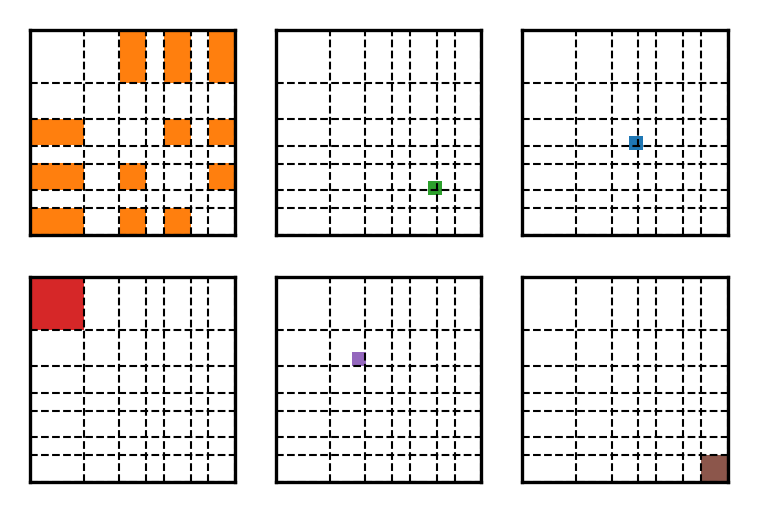

In [4]:
# Define the regions of interest
regions = [[0, 12], [20, 26], [30, 36], [40, 46]]
# Custom colors
colors = ['#ff7f0e', '#2ca02c', '#1f77b4','#d62728', '#9467bd', '#8c564b']


# Loop through each region and generate a heatmap subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3, 2), dpi=300)


# First plot with double loop
correlation_matrix_1 = np.zeros((46, 46))
for i, region_i in enumerate(regions):
    for j, region_j in enumerate(regions):
        if i !=j:
            for k in range(region_i[0], region_i[1]):
                for l in range(region_j[0], region_j[1]):
                    correlation_matrix_1[k, l] = 1
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[0]])

axs[0, 0].imshow(correlation_matrix_1, cmap=custom_cmap )
axs[0, 0].axis('on')
axs[0, 0].tick_params(axis='both', which='both', length=0)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].spines['top'].set_visible(True)
axs[0, 0].spines['right'].set_visible(True)
axs[0, 0].spines['bottom'].set_visible(True)
axs[0, 0].spines['left'].set_visible(True)



# Second plot with single region [30,36]
correlation_matrix_2 = np.zeros((46, 46))
for i in range(34, 37): #34-39 original
    for j in range(34, 37):
         #if i == j:
            correlation_matrix_2[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[1]])

axs[0, 1].imshow(correlation_matrix_2, cmap=custom_cmap)
axs[0, 1].axis('on')
axs[0, 1].tick_params(axis='both', which='both', length = 0)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].spines['top'].set_visible(True)
axs[0, 1].spines['right'].set_visible(True)
axs[0, 1].spines['bottom'].set_visible(True)
axs[0, 1].spines['left'].set_visible(True)



# Third plot with single region [20,26]
correlation_matrix_3 = np.zeros((46, 46))
for i in range(24, 27): # 24-29 original
    for j in range(24, 27):
         #if i == j:
            correlation_matrix_3[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[2]])

axs[0, 2].imshow(correlation_matrix_3, cmap=custom_cmap)
axs[0, 2].axis('on')
axs[0, 2].tick_params(axis='both', which='both', length=0)
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])
axs[0, 2].spines['top'].set_visible(True)
axs[0, 2].spines['right'].set_visible(True)
axs[0, 2].spines['bottom'].set_visible(True)
axs[0, 2].spines['left'].set_visible(True)




# Fourth plot with single region [0,12]
correlation_matrix_4 = np.zeros((46, 46))
for i in range(0, 12):
    for j in range(0, 12):
        # if i == j::
            correlation_matrix_4[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[3]])

axs[1, 0].imshow(correlation_matrix_4, cmap=custom_cmap)
axs[1, 0].axis('on')
axs[1, 0].tick_params(axis='both', which='both', length=0)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].spines['top'].set_visible(True)
axs[1, 0].spines['right'].set_visible(True)
axs[1, 0].spines['bottom'].set_visible(True)
axs[1, 0].spines['left'].set_visible(True)


# Fifth plot with single region [12,20]
                
correlation_matrix_5 = np.zeros((46, 46))
for i in range(17, 20):
    for j in range(17, 20):
        # if i == j::
            correlation_matrix_5[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[4]])

axs[1, 1].imshow(correlation_matrix_5, cmap=custom_cmap)
axs[1, 1].axis('on')
axs[1, 1].tick_params(axis='both', which='both', length=0)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].spines['top'].set_visible(True)
axs[1, 1].spines['right'].set_visible(True)
axs[1, 1].spines['bottom'].set_visible(True)
axs[1, 1].spines['left'].set_visible(True)




# Sixth plot with single region [40,46]
correlation_matrix_6 = np.zeros((46, 46))
for i in range(40, 46):
    for j in range(40, 46):
        # if i == j::
            correlation_matrix_6[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[5]])

axs[1, 2].imshow(correlation_matrix_6, cmap=custom_cmap)
axs[1, 2].axis('on')
axs[1, 2].tick_params(axis='both', which='both', length=0)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])
axs[1, 2].spines['top'].set_visible(True)
axs[1, 2].spines['right'].set_visible(True)
axs[1, 2].spines['bottom'].set_visible(True)
axs[1, 2].spines['left'].set_visible(True)


# Add vertical and horizontal lines around each region
for i, region in enumerate(regions):
    for ax in axs.flatten():
        ax.axvline(x=region[0]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(x=region[1]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axhline(y=region[0]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axhline(y=region[1]-0.5, color='black', linewidth=0.5, linestyle='--')

plt.show()


## load pre-computed place field data and calculate correlation matrices

In [ ]:
all_day_corr = []

for anm_n,name in enumerate(names):
    # load data.
    path = f'/.../Tyche/vr2p_datasets/Set A/{name}/'
    print(path)
    
    data = vr2p.ExperimentData(path) # You can normally just put the file path here as text.
    # Generate index for days animal is performing Cue Set A only.
    day_count = []

    for i in range(len(data.signals.multi_session.F)):
        if ('Cue Set A' in data.vr[i].trial.set.unique()) and (len(data.vr[i].trial.set.unique())==1):
            day_count.append(i)
        else:
            break
    print(max(day_count))

    #load stored place field analysis for each day

    range_A = range(max(day_count)+1)
    criteria = 'putative'

    #zarr_location = get_main_data_folder()/'placefields'/f"{name[0:8]}-SetA.zarr-PF.zarr"
    zarr_file = zarr.open(f'/.../Tyche/vr2p_datasets/placefields/50_600_SetA/{name[0:8]}-PF.zarr', mode="r")

    pf_all_T1 = [zarr_file[f'Cue Set A/1/excl_no_response/{i}/{criteria}'][()] for i in range_A]
    pf_all_T2 = [zarr_file[f'Cue Set A/2/excl_no_response/{i}/{criteria}'][()] for i in range_A]

    binF_T1 = [zarr_file[f'Cue Set A/1/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]
    binF_T2 = [zarr_file[f'Cue Set A/2/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]

    binF_T1_all = np.array(binF_T1).T
    binF_T2_all = np.array(binF_T2).T
    
    corr_position_day = np.zeros((binF_T1_all.shape[2],binF_T1_all.shape[0],binF_T1_all.shape[0]))


    for day_num in range(binF_T1_all.shape[2]):
        for pos_bin in range(binF_T1_all.shape[0]):
            corr_position_day[day_num,:,:] = np.corrcoef(binF_T1_all[:,:,day_num],binF_T2_all[:,:,day_num])[:46, 46:]
    all_day_corr.append(corr_position_day)


## Plot correlation coefficient for key sections of the track over days

In [ ]:
correlation_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3]
correlation_matrices_2 = [correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]

labels_1 = ['Off Diag','Post R1', 'Post Ind']
labels_2 = ['Initial','Ind', 'End']
colors_1 = ['gray', 'green','purple']
colors_2 = ['red','orange','cyan']
all_masks_matrix = np.full((6,len(all_day_corr),20), np.nan)

for session_n in range(len(all_day_corr)):
    corr_position_day = all_day_corr[session_n]


    # Set square aspect ratio for both plots
    fig, ax1 = plt.subplots(figsize=(3, 3), dpi=300)

    # Plot the first set of correlation matrices
    for i, mask in enumerate(correlation_matrices_1):
        mask_array = np.zeros((corr_position_day.shape[0], corr_position_day.shape[1], corr_position_day.shape[2]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(corr_position_day, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        ax1.plot(mean_values_array, 'o-', label=labels_1[i], color=colors_1[i])
        all_masks_matrix[i,session_n,0:len(mean_values_array)] = mean_values_array

    # Set the y-axis limits to 0 to 0.8 for the first plot
    ax1.set_ylim([-0.5, 1])
    ax1.set_title(names[session_n])

    # Add legend and labels for the first plot
    ax1.legend(fontsize='x-small')
    ax1.set_xlabel('Session #')
    ax1.set_ylabel('Correlation Coefficient')
    ax1.set_xticks(np.arange(len(mean_values_array)))
    ax1.set_xticklabels(np.arange(1, len(mean_values_array) + 1))

    # Set square aspect ratio for both plots
    fig, ax2 = plt.subplots(figsize=(3, 3), dpi=300)

    # Plot the second set of correlation matrices
    for i, mask in enumerate(correlation_matrices_2):
        mask_array = np.zeros((corr_position_day.shape[0], corr_position_day.shape[1], corr_position_day.shape[2]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(corr_position_day, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        ax2.plot(mean_values_array, 'o-', label=labels_2[i], color=colors_2[i])
        all_masks_matrix[i+3,session_n,0:len(mean_values_array)] = mean_values_array


    # Set the y-axis limits to 0 to 0.8 for the second plot
    ax2.set_ylim([0, 1])

    # Add legend and labels for the second plot
    ax2.legend(fontsize='x-small')
    ax2.set_xlabel('Session #')
    ax2.set_ylabel('Correlation Coefficient')
    ax2.set_xticks(np.arange(len(mean_values_array)))
    ax2.set_xticklabels(np.arange(1, len(mean_values_array) + 1))


In [76]:
# List of animal names
animal_names = ['A4', 'A5', 'A7', 'B2', 'B3', 'B4', 'B5', 'C1', 'D1', 'F1', 'F5']

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Animal', 'Off Diag', 'Pre-R2', 'Pre-R1'])

data_list = []  # We will store each new row here and concat in a single step at the end

# Loop and populate DataFrame
for j, animal in enumerate(animal_names):
    for i in range(20):  # loop over the 20 days
        off_diag = all_masks_matrix[0, j, i]
        pre_r2 = all_masks_matrix[1, j, i]
        pre_r1 = all_masks_matrix[2, j, i]
        # Check if any value is NaN, and skip if all are NaN
        if not (np.isnan(off_diag) and np.isnan(pre_r2) and np.isnan(pre_r1)):
            new_row = {'Animal': animal, 'Off Diag': off_diag, 'Pre-R2': pre_r2, 'Pre-R1': pre_r1}
            data_list.append(new_row)

# Use pandas.concat for better performance
df = pd.concat([df, pd.DataFrame(data_list)], ignore_index=True)

## Append correlation columns to the CPD dataframe
CPD_ALL = pd.read_pickle('CPD_ALL_results.pkl')
# Add the desired columns from df to CPD_ALL
CPD_ALL['Off Diag'] = df['Off Diag']
CPD_ALL['Pre-R2'] = df['Pre-R2']
CPD_ALL['Pre-R1'] = df['Pre-R1']

CPD_ALL

,animal,cum_period,session,r2,max_strategy,max_value,is_guided,random,both_r,lick_stop,expert,n_near,n_far,Off Diag,Pre-R2,Pre-R1
0,A4,0,0,0.072122,random,0.305000,True,0.305000,1.572031e-02,8.611852e-07,0.042053,30,23,0.181779,0.628417,0.560770
1,A4,1,1,0.113982,random,0.215413,True,0.215413,3.277390e-02,4.882190e-02,0.072772,31,34,0.065797,0.758162,0.781162
2,A4,2,2,0.541576,lick_stop,0.263629,False,0.057786,2.005721e-01,2.636285e-01,0.176210,27,26,0.027517,0.789436,0.578892
3,A4,3,3,0.579428,lick_stop,0.352289,False,0.005838,2.096116e-02,3.522890e-01,0.044551,33,37,-0.008443,0.526866,0.770310
4,A4,4,4,0.509620,lick_stop,0.252158,False,0.006764,6.853461e-03,2.521580e-01,0.002163,47,38,-0.036479,0.221923,0.462469
5,A4,5,5,0.516242,lick_stop,0.254288,False,0.015525,2.394535e-03,2.542881e-01,0.001373,42,33,-0.008547,0.347292,0.569660
6,A4,6,6,0.627359,lick_stop,0.168261,False,0.092488,3.056691e-02,1.682607e-01,0.042711,55,58,-0.043342,0.191652,0.501487
7,A4,7,7,0.600052,expert,0.126145,False,0.023089,2.005034e-04,1.186451e-01,0.126145,52,61,-0.032366,0.133058,0.283567
8,A4,8,8,0.751760,expert,0.331980,False,0.084371,6.710042e-02,2.721606e-02,0.331980,55,53,-0.030861,0.228410,0.377906
9,A4,9,9,0.557085,expert,0.217517,False,0.017934,3.591670e-02,1.409952e-04,0.217517,52,44,-0.057534,0.543454,0.425516


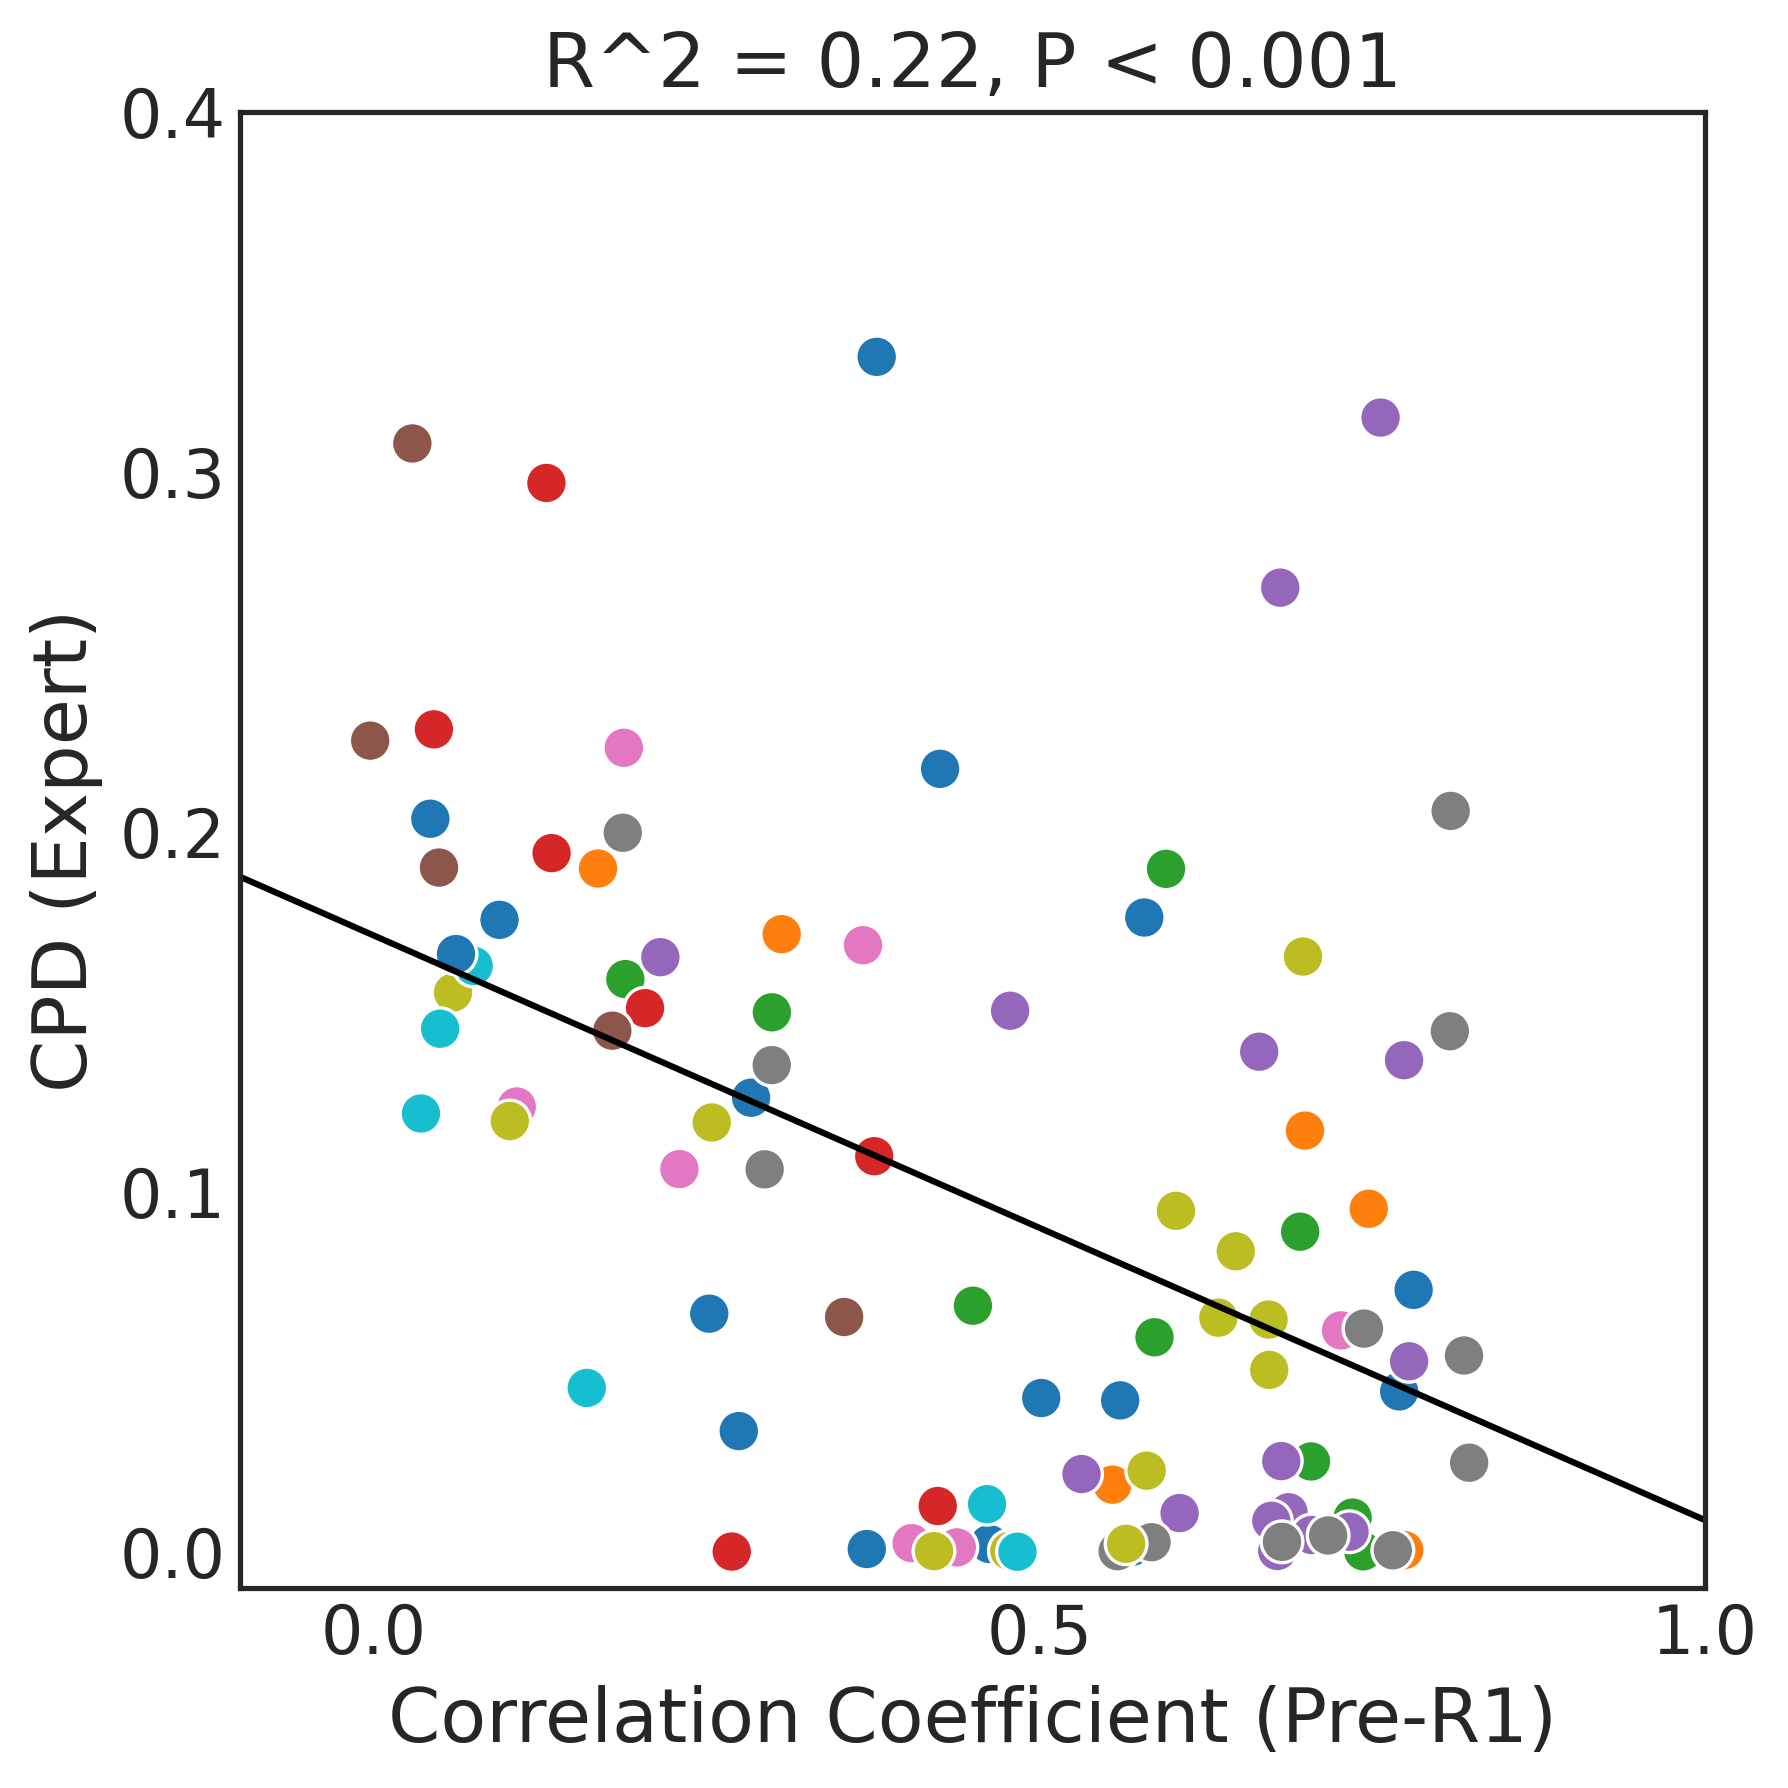

In [117]:
# Summary plot 1x1 grid
fig2, ax_summary = plt.subplots(figsize=(6, 6), dpi=300)

slope, intercept, r_value, p_value, _ = linregress(CPD_ALL['Pre-R1'], CPD_ALL.expert)
sns.scatterplot(x=CPD_ALL['Pre-R1'], y=CPD_ALL.expert, ax=ax_summary, hue=CPD_ALL["animal"], palette=colors, s=100, legend=None)

x = np.linspace(-0.1, 1, 100)
ax_summary.plot(x, intercept + slope*x, color="black")

p_text = f"P = {p_value:.3f}" if p_value >= 0.001 else "P < 0.001"
ax_summary.set_title(f"R^2 = {r_value**2:.2f}, {p_text}", fontsize=18)

ax_summary.set_xlim(-0.1, 1)
ax_summary.set_ylim(-0.01, 0.35)
ax_summary.set_xticks([0, 0.5, 1])
ax_summary.set_yticks(np.arange(0, 0.5, 0.1))
ax_summary.set_xlabel("Correlation Coefficient (Pre-R1)", fontsize=18)
ax_summary.set_ylabel("CPD (Expert)", fontsize=18)
ax_summary.tick_params(axis='both', which='both', direction='in', labelsize=16)

plt.tight_layout()
plt.savefig("summary_CPD_vs_Corr.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


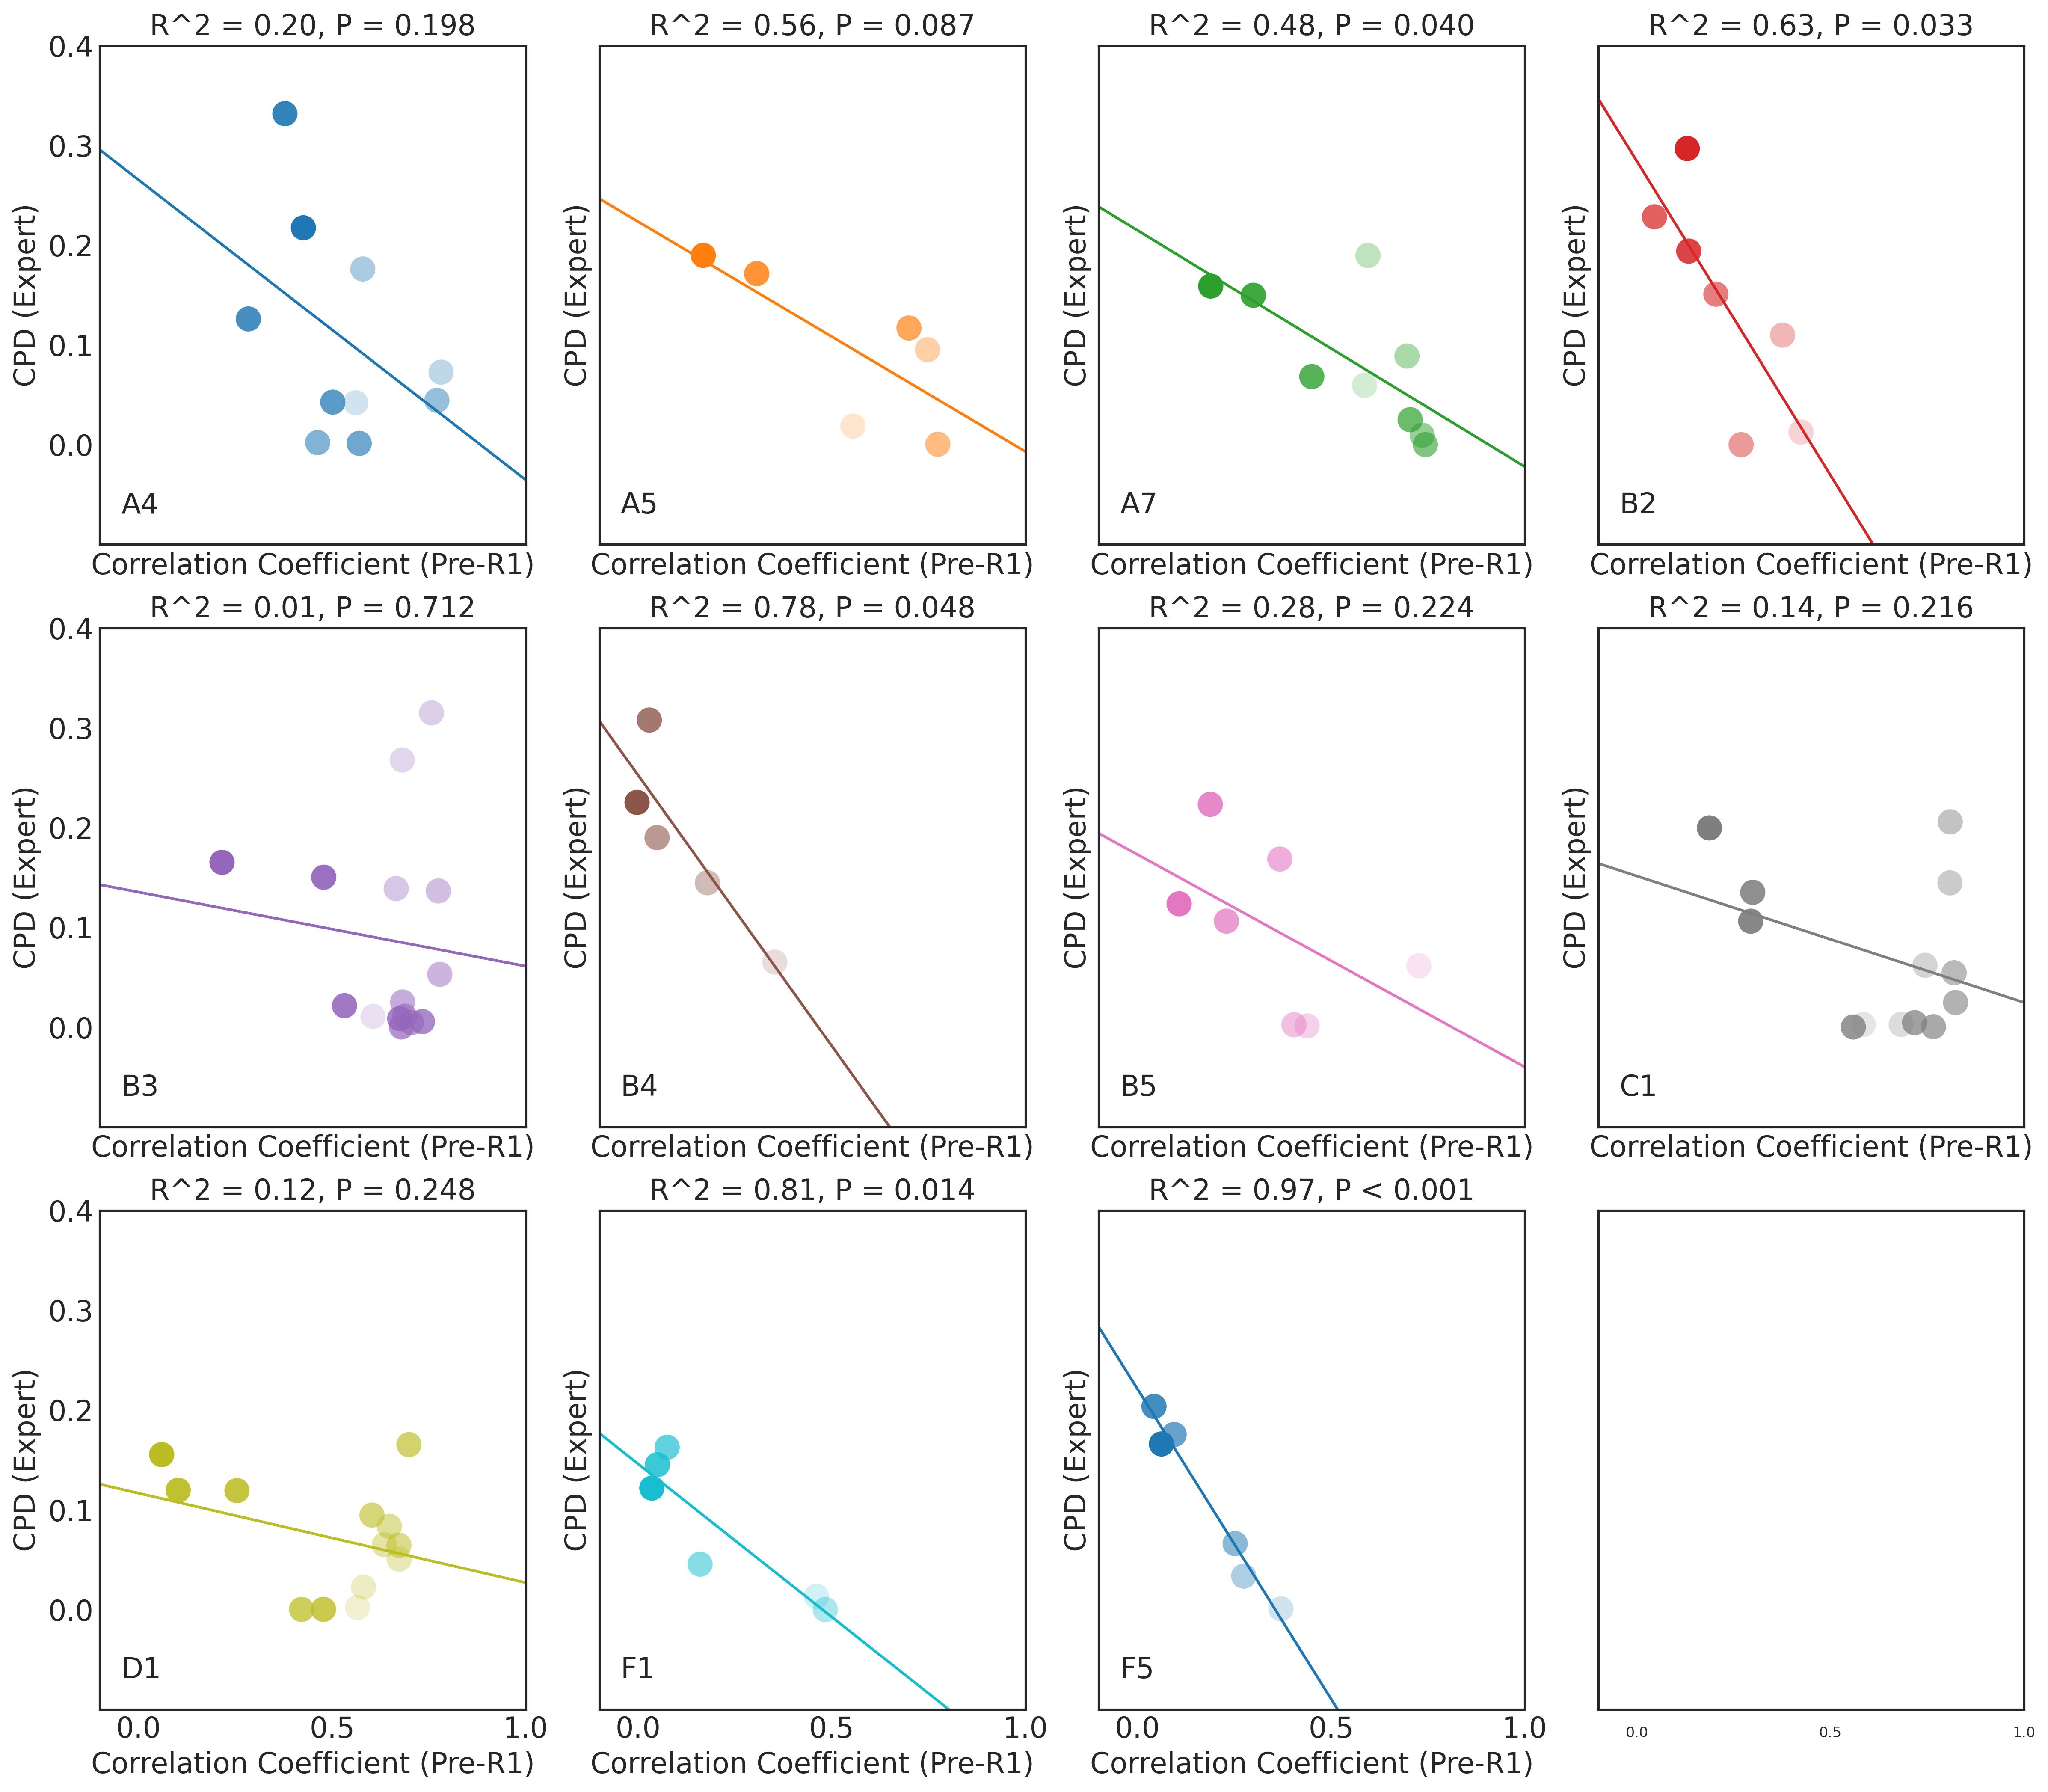

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sns.set_style("white")
colors = sns.color_palette("tab10", n_colors=len(animal_names))

fig1, axes = plt.subplots(3, 4, figsize=(16, 14), dpi=300, sharex=True, sharey=True)

for idx, animal in enumerate(animal_names):
    row, col = divmod(idx, 4)
    ax = axes[row, col]
    
    if row == 2 and col == 3:
        ax.axis('off')
        continue
    
    c_result = CPD_ALL.loc[CPD_ALL.animal == animal]
    slope, intercept, r_value, p_value, _ = linregress(c_result['Pre-R1'], c_result.expert)
    
    # Calculate alphas based on the number of data points
    num_points = len(c_result)
    alphas = np.linspace(0.2, 1, num_points)
    
    for i, (x, y) in enumerate(zip(c_result['Pre-R1'], c_result.expert)):
        ax.scatter(x, y, color=colors[idx], s=200, alpha=alphas[i], edgecolor='none')
        
    x_vals = np.linspace(-0.1, 1, 100)
    ax.plot(x_vals, intercept + slope*x_vals, color=colors[idx])

    p_text = f"P = {p_value:.3f}" if p_value >= 0.001 else "P < 0.001"
    ax.set_title(f"R^2 = {r_value**2:.2f}, {p_text}", fontsize=16)
    ax.annotate(animal, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=16, ha='left', va='bottom')

    ax.set_xlim(-0.1, 1)
    ax.set_ylim(-0.1, 0.4)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks(np.arange(0, 0.5, 0.1))
    ax.set_xlabel("Correlation Coefficient (Pre-R1)", fontsize=16)
    ax.set_ylabel("CPD (Expert)", fontsize=16)
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16)

plt.tight_layout()
plt.savefig("individual_CPD_vs_Corr.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


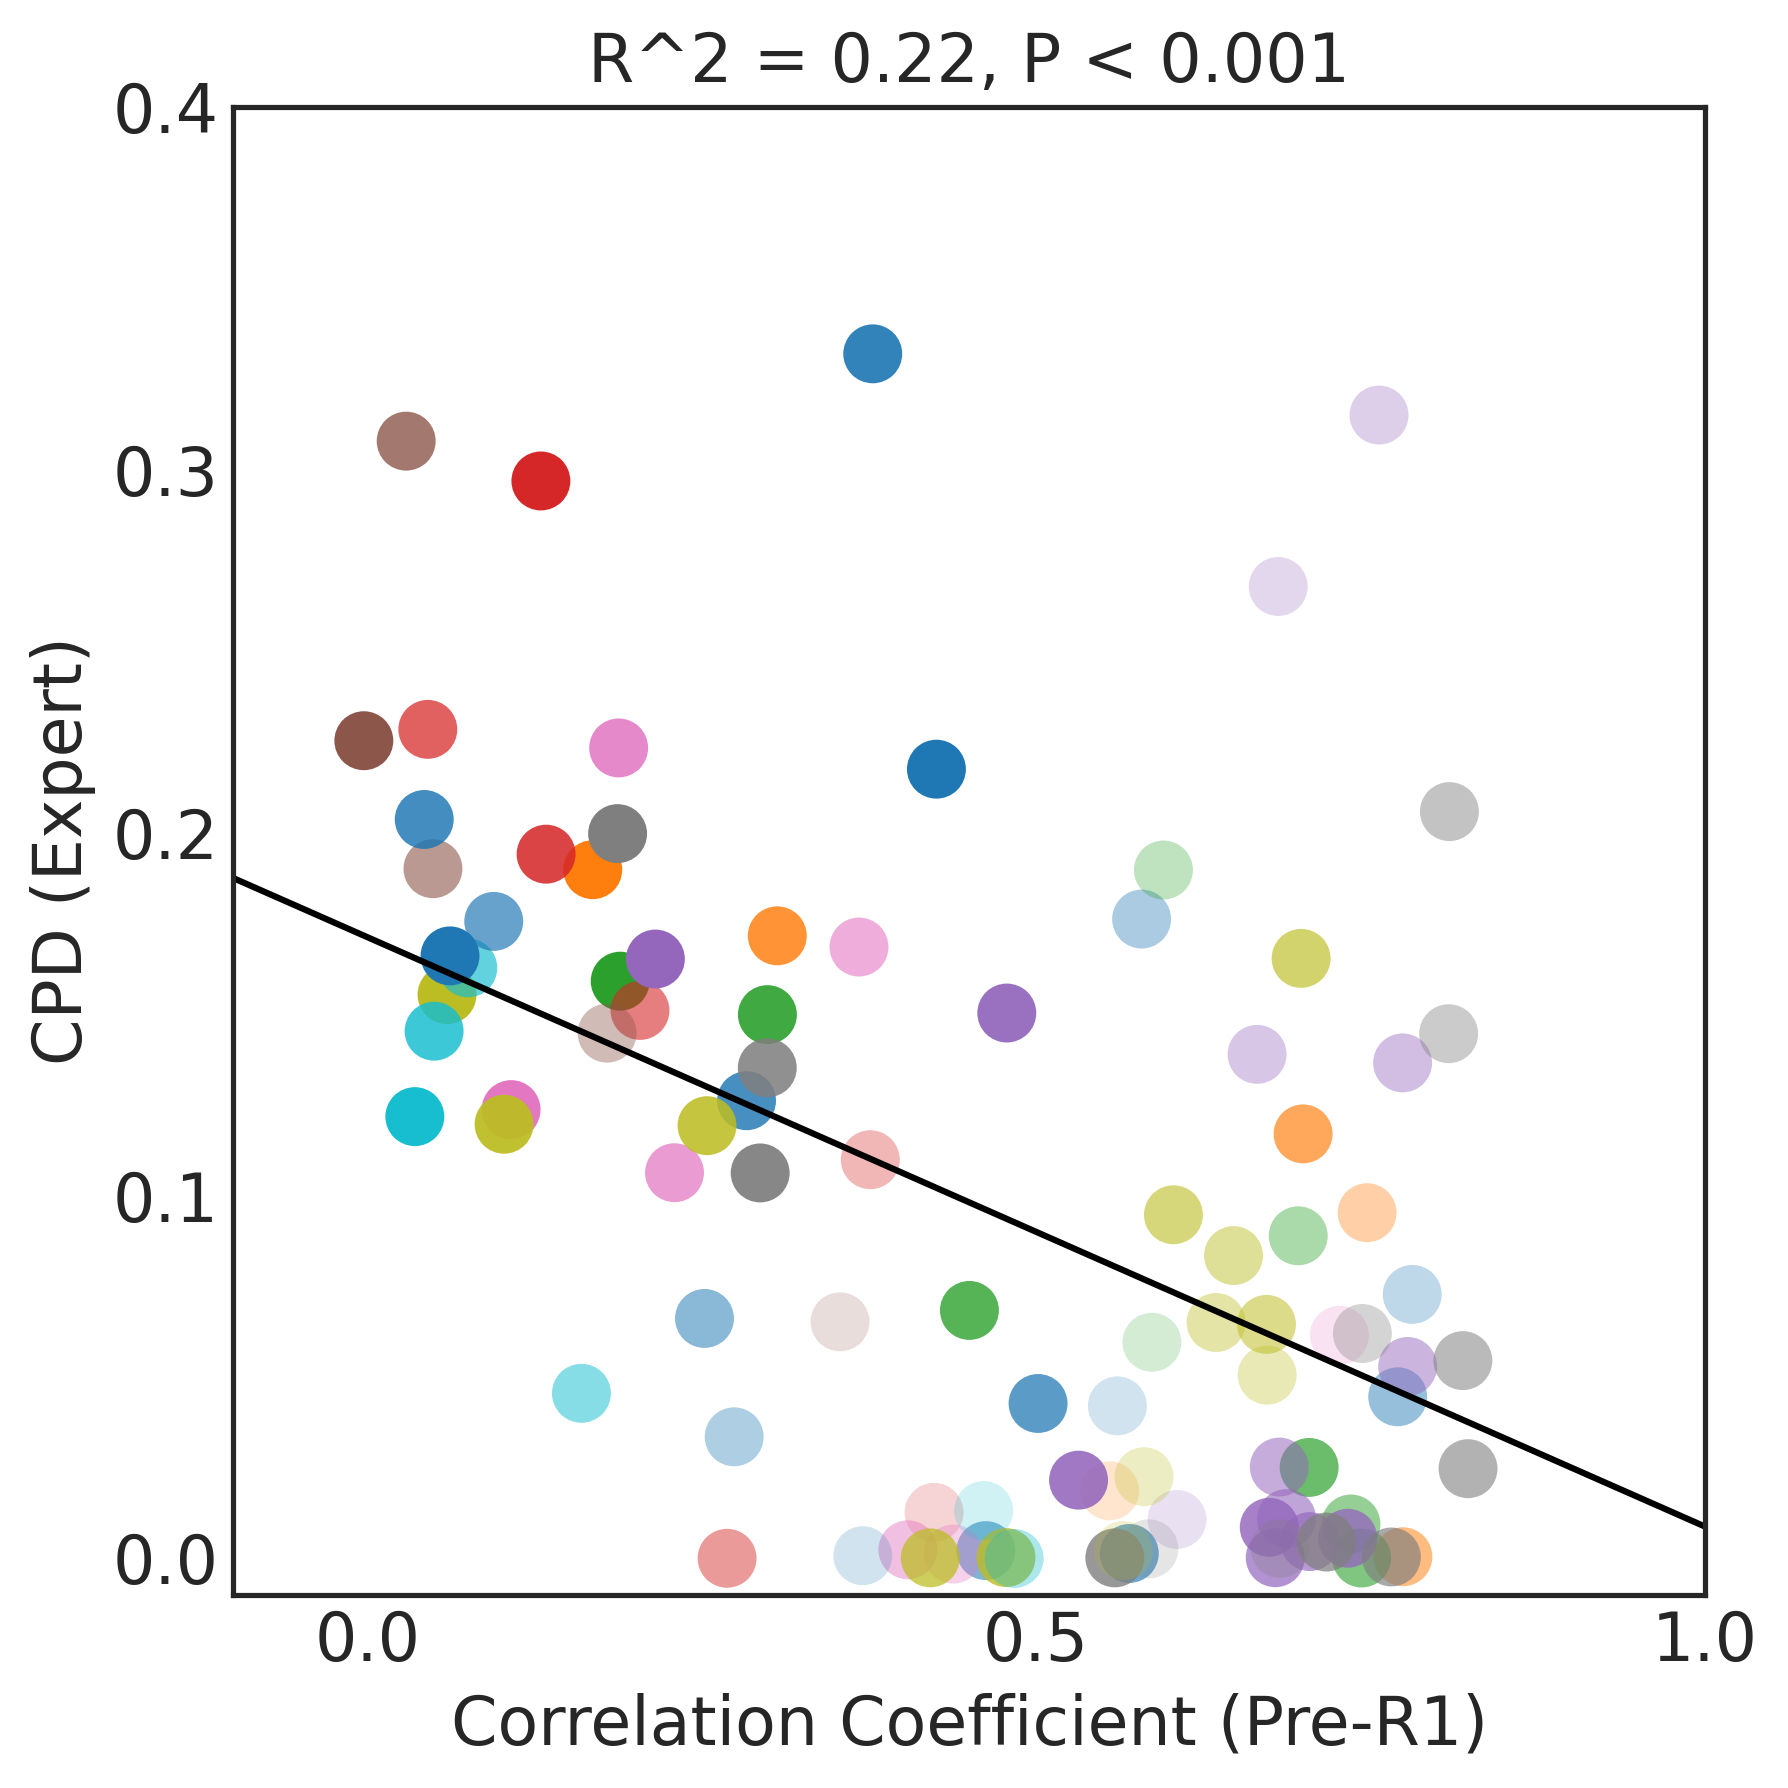

In [129]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Summary plot for all animals
fig2, ax2 = plt.subplots(figsize=(6, 6), dpi=300)

# Unique colors for each animal
color_dict = {animal: colors[idx] for idx, animal in enumerate(animal_names)}

# Iterate through each animal and plot its data with varying alphas
for animal in animal_names:
    animal_data = CPD_ALL[CPD_ALL['animal'] == animal]
    alphas = np.linspace(0.2, 1, len(animal_data))
    
    for idx, (data_idx, row) in enumerate(animal_data.iterrows()):
        ax2.scatter(row['Pre-R1'], row.expert, color=color_dict[row['animal']], s=200, alpha=alphas[idx], edgecolor='none')

# Linear regression for all data points
slope, intercept, r_value, p_value, _ = linregress(CPD_ALL['Pre-R1'], CPD_ALL.expert)
x = np.linspace(-0.1, 1, 100)
ax2.plot(x, intercept + slope*x, color='black')

p_text = f"P = {p_value:.3f}" if p_value >= 0.001 else "P < 0.001"
ax2.set_title(f"R^2 = {r_value**2:.2f}, {p_text}", fontsize=16)

# Set x and y axis details
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(-0.01, 0.4)
ax2.set_xticks([0, 0.5, 1])
ax2.set_yticks(np.arange(0, 0.5, 0.1))
ax2.set_xlabel("Correlation Coefficient (Pre-R1)", fontsize=16)
ax2.set_ylabel("CPD (Expert)", fontsize=16)
ax2.tick_params(axis='both', which='both', direction='in', labelsize=16)

plt.tight_layout()
plt.savefig("summary_CPD_vs_Corr.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()
